In [8]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# import data
data = "../2019 Winter Data Science Intern Challenge Data Set.csv"
orders_df = pd.read_csv(data)
orders_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35


In [4]:
orders_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## 1. Examine total items for outliers and possible errors

{'whiskers': [<matplotlib.lines.Line2D at 0x2308933fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x2308934c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2308933f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2308934ca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2308934cd90>],
 'means': []}

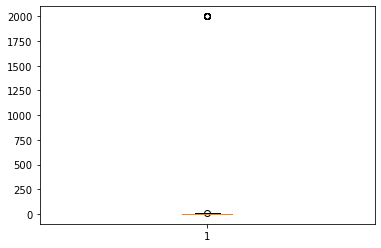

In [11]:
# plot total items in box plot to visualize possible outliers
plt.boxplot(orders_df['total_items'])

In [39]:
# define function to calculate find the upper fence for outliers of a given column
def up_fence(dataframe,column):
    # find upper quartile
    q3 = dataframe.describe().loc['75%',column]
    # find lower quartile
    q1 = dataframe.describe().loc['25%',column]
    # calculate interquartile range
    iq = q3 - q1
    # upper fence
    uf = q3 + 1.5*iq
    return uf

In [40]:
# calculate the uf for total items
items_uf = up_fence(orders_df,'total_items')
items_uf

6.0

In [45]:
#analyze orders with mor total items than the uf
tot_it_outliers = orders_df[orders_df['total_items']>items_uf]
tot_it_outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,3/7/2017 4:00
60,61,42,607,704000,2000,credit_card,3/4/2017 4:00
520,521,42,607,704000,2000,credit_card,3/2/2017 4:00
1104,1105,42,607,704000,2000,credit_card,3/24/2017 4:00
1362,1363,42,607,704000,2000,credit_card,3/15/2017 4:00
1436,1437,42,607,704000,2000,credit_card,3/11/2017 4:00
1562,1563,42,607,704000,2000,credit_card,3/19/2017 4:00
1602,1603,42,607,704000,2000,credit_card,3/17/2017 4:00
2153,2154,42,607,704000,2000,credit_card,3/12/2017 4:00
2297,2298,42,607,704000,2000,credit_card,3/7/2017 4:00


In [47]:
# get counts of outlier totals
tot_it_outliers['total_items'].value_counts()

2000    17
8        1
Name: total_items, dtype: int64

### Total Orders outliers
-There are 17 orders with 2000 units ordered, and all from the same store. This is likely caused by some error in the order tracking system of store 607 and these orders should be dropped from the dataset until the cause of the error is investigated and corrected

-There is one order with 8 units ordered. While this is statistically an outlier, 8 units seems a reasonable number of units for an order, so this order is worth keeping in the data set.

In [49]:
# drop orders with 2000 units ordered from the dataset
orders_df2 = orders_df[orders_df['total_items']!=2000]
orders_df2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,3/30/2017 13:47
4996,4997,48,789,234,2,cash,3/16/2017 20:36
4997,4998,56,867,351,3,cash,3/19/2017 5:42
4998,4999,60,825,354,2,credit_card,3/16/2017 14:51


In [50]:
# get summary statistics to determine if average order amount is still unreasonably high
orders_df2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


## The average order amount seams more reasonable at 754, however the max order amount still seems unreasonable high.

## 2. Determine if item cost may be incorrect on some orders

In [51]:
# calculate cost per item to determine if some items are mis-priced
orders_df2['item_cost'] = orders_df2['order_amount']/orders_df2['total_items']
orders_df2['item_cost']

C:\Users\Michael\AppData\Local\Temp/ipykernel_14876/1707825764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df2['item_cost'] = orders_df2['order_amount']/orders_df2['total_items']


0       112.0
1        90.0
2       144.0
3       156.0
4       156.0
        ...  
4995    165.0
4996    117.0
4997    117.0
4998    177.0
4999    144.0
Name: item_cost, Length: 4983, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2308961af70>,
 'caps': [<matplotlib.lines.Line2D at 0x230896276d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2308961abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x23089627df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230896331c0>],
 'means': []}

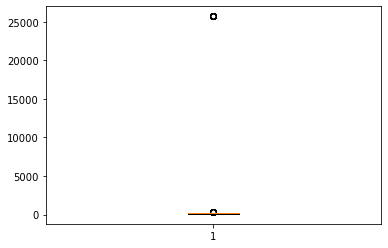

In [55]:
# view boxplot to visualize possible outliers in item cost
plt.boxplot(orders_df2['item_cost'])x

### The cost of approx 25,000 for one item is unreasonably high for sneakers

In [56]:
# find out determine how many orders have this cost
orders_df2['item_cost'].value_counts()

153.0      256
160.0      206
156.0      197
142.0      197
164.0      161
176.0      152
133.0      151
130.0      150
177.0      148
129.0      142
112.0      124
163.0      122
118.0      118
181.0      112
178.0      109
187.0      105
136.0      105
148.0      101
161.0      101
173.0       99
131.0       97
158.0       94
128.0       93
145.0       92
146.0       89
134.0       86
117.0       77
196.0       61
114.0       59
138.0       59
116.0       58
165.0       58
140.0       55
94.0        55
154.0       54
195.0       54
169.0       54
201.0       53
147.0       53
127.0       52
149.0       52
122.0       50
184.0       49
171.0       48
162.0       48
132.0       46
25725.0     46
193.0       44
166.0       43
90.0        42
155.0       42
101.0       42
111.0       40
144.0       39
168.0       39
172.0       35
190.0       35
352.0       34
Name: item_cost, dtype: int64

In [57]:
# find upper fence for item cost to determine if any other prices are outliers
cost_uf = up_fence(orders_df2,'item_cost')
cost_uf

220.5

In [59]:
orders_df2[orders_df2['item_cost']>cost_uf].item_cost.value_counts()

25725.0    46
352.0      34
Name: item_cost, dtype: int64

### While 352 is higher than the upper fence for outliers, it is not necessarily an unreasonable price for some sneakers, so only the orders with item cost of 25725 should be dropped

In [63]:
#analyze all orders with high cost per item
wrong_cost_orders = orders_df2[orders_df2['item_cost']==orders_df2['item_cost'].max()]
wrong_cost_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost
160,161,78,990,25725,1,credit_card,3/12/2017 5:56,25725.0
490,491,78,936,51450,2,debit,3/26/2017 17:08,25725.0
493,494,78,983,51450,2,cash,3/16/2017 21:39,25725.0
511,512,78,967,51450,2,cash,3/9/2017 7:23,25725.0
617,618,78,760,51450,2,cash,3/18/2017 11:18,25725.0
691,692,78,878,154350,6,debit,3/27/2017 22:51,25725.0
1056,1057,78,800,25725,1,debit,3/15/2017 10:16,25725.0
1193,1194,78,944,25725,1,debit,3/16/2017 16:38,25725.0
1204,1205,78,970,25725,1,credit_card,3/17/2017 22:32,25725.0
1259,1260,78,775,77175,3,credit_card,3/27/2017 9:27,25725.0


### Store 78 should be notified that something is wrong with their pricing and need to correct it

## Drop items with incorrect cost and analyze new metrics

In [64]:
orders_df3 = orders_df2[orders_df2['item_cost']!=orders_df2['item_cost'].max()]
orders_df3

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost
0,1,53,746,224,2,cash,3/13/2017 12:36,112.0
1,2,92,925,90,1,cash,3/3/2017 17:38,90.0
2,3,44,861,144,1,cash,3/14/2017 4:23,144.0
3,4,18,935,156,1,credit_card,3/26/2017 12:43,156.0
4,5,18,883,156,1,credit_card,3/1/2017 4:35,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,3/30/2017 13:47,165.0
4996,4997,48,789,234,2,cash,3/16/2017 20:36,117.0
4997,4998,56,867,351,3,cash,3/19/2017 5:42,117.0
4998,4999,60,825,354,2,credit_card,3/16/2017 14:51,177.0


In [65]:
orders_df3.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_cost
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [68]:
# Calculate metrics by store
store_sales_df = orders_df3.groupby('shop_id').agg({'order_id': 'count','order_amount':'sum','total_items':'sum'})
# rename colums
dict = {'order_id':'total_orders','order_amount':'total_sales'}
store_sales_df.rename(columns=dict, inplace=True)
store_sales_df.head()

,total_orders,total_sales,total_items
shop_id,,,
1,44,13588,86
2,55,9588,102
3,48,14652,99
4,51,13184,103
5,45,13064,92


In [71]:
#sort by total_sales and get top and bottom 5 stores
top_stores = store_sales_df.sort_values('total_sales',ascending=False)
top_stores.head()

,total_orders,total_sales,total_items
shop_id,,,
89,61,23128,118
81,59,22656,128
6,59,22627,121
42,34,22176,63
13,63,21760,136


In [72]:
top_stores.tail()

,total_orders,total_sales,total_items
shop_id,,,
2,55,9588,102
100,40,8547,77
56,37,8073,69
32,42,7979,79
92,42,6840,76
